<a href="https://colab.research.google.com/github/mostafizur1997/Deep-Learning/blob/main/01_Neural_Network_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defination for a regression problem: predicting a number

# What we are going to do:

* Architecture of a regression model

* input shapes and output shapes

  * X : features/data (input)
  * y: labels (output)
* Steps in modeling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * optimizer
    * evalution metrics
  * Fitting a model(getting it to find patterns in our data)
* Evaluting a model
  * Visaulizing the model ("visualize, visualize, visualize")
  * Looking at training curves 
  * Compare predictions to ground truth(using our evalution metrics)
* Saving a model (so we can use it later )
* Loading a model

# Typical architecture of a regression model
Input layer shape -->Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s)-->Problem specific, minimum = 1, maximum = unlimited

Neurons per hidden layer--> Problem specific, generally 10 to 100

Output layer shape-->Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation-->Usually ReLU (rectified linear unit)

Output activation-->None, ReLU, logistic/tanh

Loss function--> MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

Optimizer	SGD (stochastic gradient descent), Adam

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

We are working on a regression problem (predicting a number) let's create some linear data(a stright line) to model

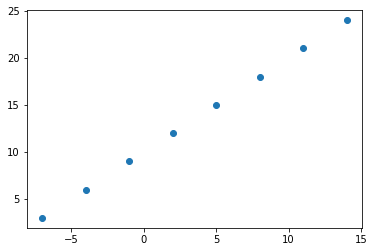

In [2]:
# Creating  data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#create feature 
X=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])


#create labels
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize data
plt.scatter(X,y)

# Regression input shapes and output shapes

* input shape: shape of your data you want to come out of your model

* output shape: output shape is the shape of your data 

In [3]:
# example input and output shapes of a regression model
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

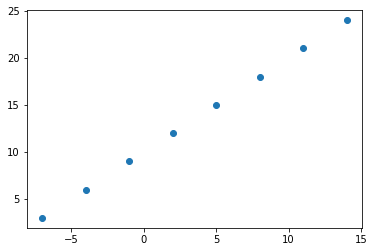

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#create features (using tensors)
X= tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels 
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)

In [6]:
#take a single example of X
input_shape= X[0].shape

#take a single example of y
output_shape =y[0].shape

input_shape, output_shape #both are scalar

(TensorShape([]), TensorShape([]))

In [7]:
#single example indivually
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with Tensorflow
Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [8]:
#set random seed
tf.random.set_seed(42)

#Create a model using the squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile a model
model.compile(
    loss= tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#fit the model
model.fit(tf.expand_dims(X,axis=-1),y , epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 19.7294 - mae: 19.7294
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 19.4481 - mae: 19.4481
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 19.1669 - mae: 19.1669
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 18.8856 - mae: 18.8856
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 18.6044 - mae: 18.6044


In [9]:
#check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
#Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[-18.099829]], dtype=float32)

#improving the model

* Adding layers
* increase numbers of hidden units
* change the activation function
* Change the optimiztion function
* Change the learning rate
* Fitting on more data 
* Fitting for longer

In [11]:
# set random seed
tf.random.set_seed(42)

#Create a model(same as above)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100) #train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 14.4653 - mae: 14.4653
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3328 - mae: 14.3328
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2003 - mae: 14.2003
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0678 - mae: 14.0678
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9353 - mae: 13.9353
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8028 - mae: 13.8028
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.6703 - mae: 13.6703
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5378 - mae: 13.5378
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4053 - mae: 13.4053
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2728 - mae: 13.2728
Epoch 11/100
1/1 [==============================] 

In [12]:
#Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[29.521566]], dtype=float32)

# Evaluting a model

In [14]:
#Make a bigger dataset
X= np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
#Make labels for the dataset
y= np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [16]:
y= X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

#Split data into training/test set
* training set 
* validation set
* test set

In [17]:
#check how many samples we have
len(X)

50

In [18]:
#Split data into train and test sets
X_train=X[:40]
y_train=y[:40]

X_test =X[40:]
y_test= y[40:]

len(X_train),len(X_test)

(40, 10)

#Visualizing the data

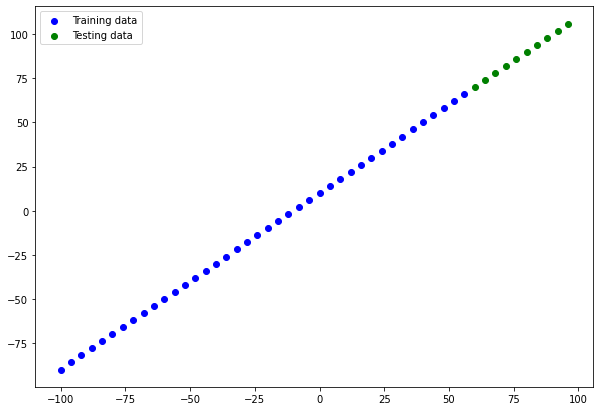

In [19]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [20]:
#set random seed
tf.random.set_seed(42)

#create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Visualizing the model

In [22]:
#doesnot work
model.summary()

ValueError: ignored

In [23]:
#set random seed
tf.random.set_seed(42)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Create model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [24]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fit the model
model.fit(X_train, y_train, epochs=100, verbose=0) #verbose controls how much gets output

In [26]:
#check the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


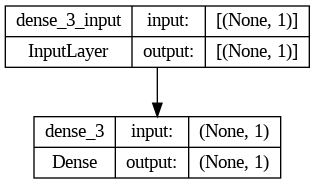

In [27]:
#view 2D plot model using plot_model()

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes =True)

#Visualizing the predictions

In [28]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 76ms/step


In [29]:
#view the predictions 
y_preds

array([[ 74.65098 ],
       [ 79.54067 ],
       [ 84.43037 ],
       [ 89.32005 ],
       [ 94.20974 ],
       [ 99.099434],
       [103.98913 ],
       [108.878815],
       [113.7685  ],
       [118.658195]], dtype=float32)

In [30]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

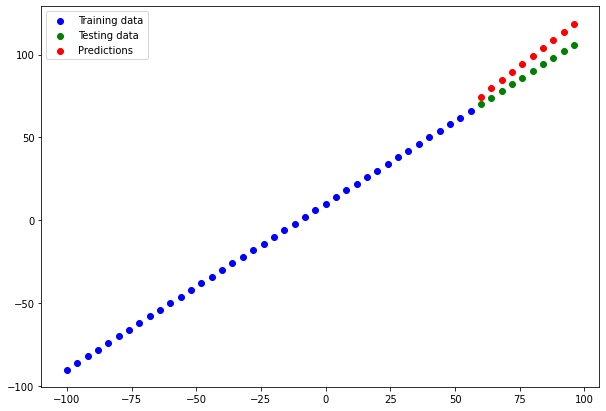

In [31]:
plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds)
 

# Evaluting predictions

* Mean absolute error(MAE)
* Mean squared error(MSE)

In [32]:
#Evalute the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 128ms/step - loss: 8.6546 - mae: 8.6546


[8.65458869934082, 8.65458869934082]

In [33]:
#Calculate the mean absolute error
mae =tf.metrics.mean_absolute_error(y_true= y_test,
                                    y_pred =y_preds
                                    )
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.409413, 11.783731, 10.313927, 10.      , 10.883896, 13.05966 ,
       16.391302, 20.878815, 25.7685  , 30.658197], dtype=float32)>

In [34]:
#check the label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [35]:
#check the prediction
y_preds

array([[ 74.65098 ],
       [ 79.54067 ],
       [ 84.43037 ],
       [ 89.32005 ],
       [ 94.20974 ],
       [ 99.099434],
       [103.98913 ],
       [108.878815],
       [113.7685  ],
       [118.658195]], dtype=float32)

In [36]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [37]:
#shape before squeeze()
y_preds.shape

(10, 1)

In [38]:
#shape after squeeze
y_preds.squeeze().shape

(10,)

In [39]:
#what do they look like?
#answer: now they are same shape
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 74.65098 ,  79.54067 ,  84.43037 ,  89.32005 ,  94.20974 ,
         99.099434, 103.98913 , 108.878815, 113.7685  , 118.658195],
       dtype=float32))

In [40]:
#calculate the mae
mae = tf.metrics.mean_squared_error(y_true =y_test,
                                     y_pred =y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=81.432175>

In [41]:
#calculate the mse
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=81.432175>

In [42]:
#returns the same as tf.metrics.mean_absoulte_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.654588317871093>

In [43]:
#let's make functions for our evalutions metrics

def mae(y_test, y_pred):
  # calculate mean absolute error between y_test and y_preds
  return tf.metrics.mean_absolute_error(y_test,y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test,y_pred)

#Running experiments to improve a model
  1. model_1- same as original model, 1 layer, trained for 100 epochs
  2. model_2- 2 layers, trained for 100 epochs
  3. model_3- 2 layers, trained for 500 epochs

# Build: model_1

In [44]:

# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 48.7338 - mae: 48.7338
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 16.6300 - mae: 16.6300
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 15.6808 - mae: 15.6808
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2460 - mae: 8.2460
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6078 - mae: 10.6078
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8193 - mae: 9.8193
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8971 - mae: 8.8971
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0828 - mae: 9.0828
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.5480 - mae: 19.5480
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5654 - mae: 10.5654
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 40ms/step


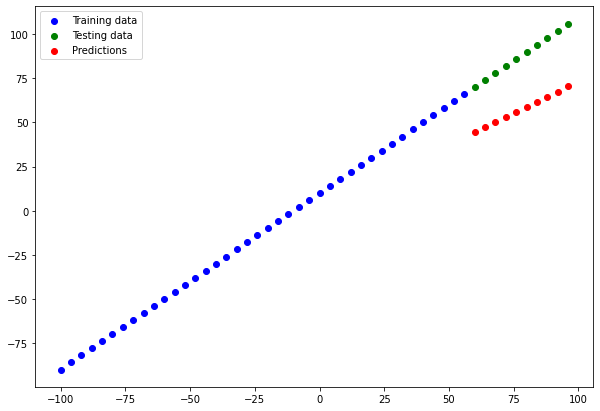

In [45]:
#Make and plot predictions for model_1
y_preds_1 =model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [46]:
#calculate model_1 metrics 
mae_1 = mae(y_test,y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test,y_preds.squeeze()).numpy()
mae_1, mse_1

(30.596949, 81.432175)

#Build model 2

In [47]:
#Add an extra Dense layer
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) #add second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output
     

1/1 [==============================] - 0s 46ms/step


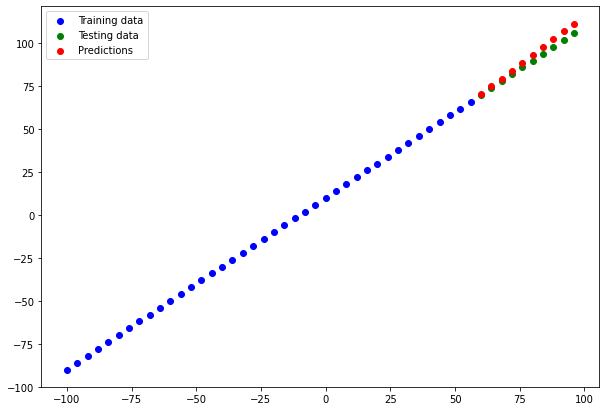

In [48]:
#make and plot prediction for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [49]:
# calculate model_2 metrics
mae_2 =mae(y_test, y_preds.squeeze()).numpy()
mse_2 =mse(y_test, y_preds.squeeze()).numpy()
mae_2, mse_2

(8.654589, 81.432175)

# Build model_3

In [50]:

# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model(this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 42ms/step


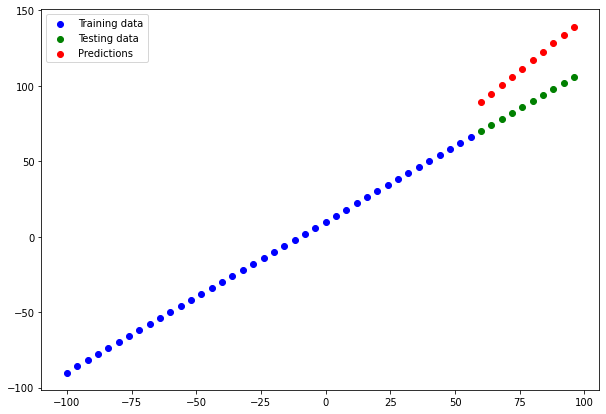

In [51]:
#Make and plot predictions for model_3
y_preds_3 =model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [52]:
mae_3= mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 =mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(26.158438, 704.61053)

# Comparing results

In [53]:
model_results =[["model_1", mae_1, mse_1],
                ["model_2", mae_2, mse_2],
                ["model_3", mae_3, mae_3]]

In [54]:
import pandas as pd
all_results =pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,30.596949,81.432175
1,model_2,8.654589,81.432175
2,model_3,26.158438,26.158438


# Saving model
save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

  * The SavedModel format (default).
  * The HDF5 format.

In [55]:
model_3.save('best_model_SavedModel_format')

In [56]:
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [57]:
model_3.save("best_model_HDF5_format.h5")

In [58]:
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


#Loading a model

In [59]:
#load a model form the SaveModel format

loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()
     

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [60]:
#comapre model_3 with the saveModel version (should return True)
model_3_preds =model_3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_3_preds.squeeze()).numpy()

1/1 [==============================] - 0s 68ms/step


True

In [61]:
#Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [62]:
#compare model_3 with the loaded HDF5 format
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 96ms/step


NameError: ignored

In [ ]:
#Download the model from google colab
from google.colab import files
files.download("best_model_HDF5_format.h5")